### Testing H5 Files on CIFAR100 Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings('default')

import csv
import json
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l1, l2

from sklearn.metrics import classification_report

In [3]:
fine_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin',
    'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard',
    'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck',
    'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew',
    'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television',
    'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

coarse_names = [
    'fruit and vegetables', 'fish', 'people', 'large carnivores', 'aquatic mammals', 'household furniture', 'insects', 'insects', 'vehicles 1',
    'food containers', 'food containers', 'people', 'large man-made outdoor things', 'vehicles 1', 'insects', 'large omnivores and herbivores',
    'food containers', 'large man-made outdoor things', 'insects', 'large omnivores and herbivores', 'household furniture',
    'large omnivores and herbivores', 'household electrical device', 'large natural outdoor scenes', 'insects', 'household furniture',
    'non-insect invertebrates', 'reptiles', 'food containers', 'reptiles', 'aquatic mammals', 'large omnivores and herbivores', 'fish',
    'large natural outdoor scenes', 'medium-sized mammals', 'people', 'small mammals', 'large man-made outdoor things', 'large omnivores and herbivores',
    'household electrical device', 'household electrical device', 'vehicles 2', 'large carnivores', 'large carnivores', 'reptiles',
    'non-insect invertebrates', 'people', 'trees', 'vehicles 1', 'large natural outdoor scenes', 'small mammals', 'fruit and vegetables', 'trees',
    'fruit and vegetables', 'flowers', 'aquatic mammals', 'trees', 'fruit and vegetables', 'vehicles 1', 'trees', 'large natural outdoor scenes',
    'food containers', 'flowers', 'medium-sized mammals', 'medium-sized mammals', 'small mammals', 'medium-sized mammals', 'fish',
    'large man-made outdoor things', 'vehicles 2', 'flowers', 'large natural outdoor scenes', 'aquatic mammals', 'fish', 'small mammals',
    'medium-sized mammals', 'large man-made outdoor things', 'non-insect invertebrates', 'reptiles', 'non-insect invertebrates', 'small mammals',
    'vehicles 2', 'flowers', 'fruit and vegetables', 'household furniture', 'vehicles 2', 'household electrical device', 'household electrical device',
    'large carnivores', 'vehicles 2', 'vehicles 1', 'fish', 'flowers', 'reptiles', 'household furniture', 'aquatic mammals', 'trees', 'large carnivores',
    'people', 'non-insect invertebrates'
]

In [9]:
# Load a model to review performance from the src/models folder
model_file_name = 'model_cnn_20240729_210925'
model_name = 'model_cnn_20240729_210925'
mdl = load_model(f'/content/drive/MyDrive/cifar100/src/models/{model_file_name}.h5')

In [5]:
# Load CIFAR-100 data  https://www.cs.toronto.edu/%7Ekriz/cifar.html
#Each image has a "fine" label (class) and a "coarse" label (superclass).
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# normalize pixel values
x_train, x_test = x_train/255, x_test/255

y_train_raw = y_train.copy()

#one hot encode labels
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

169001437/169001437 [==============================] - 2s 0us/step


In [6]:
# Make predictions
y_pred = np.argmax(mdl.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

final_accuracy = np.sum(y_pred == y_true) / len(y_true)
print(f"\nAccuracy: {final_accuracy * 100:.2f}%")

313/313 [==============================] - 15s 49ms/step

Accuracy: 65.94%


In [10]:
report = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=fine_names, output_dict=True)

data = {
    'Coarse Label': coarse_names,
    'Fine Label': fine_names,
    'Error': [round(1 - report[label]['recall'], 3) * 100 for label in fine_names],
    'Precision': [round(report[label]['precision'], 3) * 100 for label in fine_names],
    'Recall': [report[label]['recall'] * 100 for label in fine_names],
    'F1-Score': [report[label]['f1-score'] for label in fine_names],
    'Population': [np.sum(np.argmax(y_test, axis=1) == idx) for idx in range(len(fine_names))]
}

class_performance = pd.DataFrame(data).sort_values(by='Error', ascending=False)
# class_performance.to_csv('error_data.csv', index=False)

class_performance

,Coarse Label,Fine Label,Error,Precision,Recall,F1-Score,Population
55,aquatic mammals,otter,78.0,43.1,22.0,0.291391,100
44,reptiles,lizard,66.0,42.0,34.0,0.375691,100
72,aquatic mammals,seal,64.0,39.1,36.0,0.375000,100
10,food containers,bowl,63.0,61.7,37.0,0.462500,100
38,large omnivores and herbivores,kangaroo,62.0,57.6,38.0,0.457831,100
...,...,...,...,...,...,...,...
82,flowers,sunflower,12.0,87.1,88.0,0.875622,100
68,large man-made outdoor things,road,12.0,93.6,88.0,0.907216,100
60,large natural outdoor scenes,plain,11.0,71.2,89.0,0.791111,100
53,fruit and vegetables,orange,8.0,77.3,92.0,0.840183,100


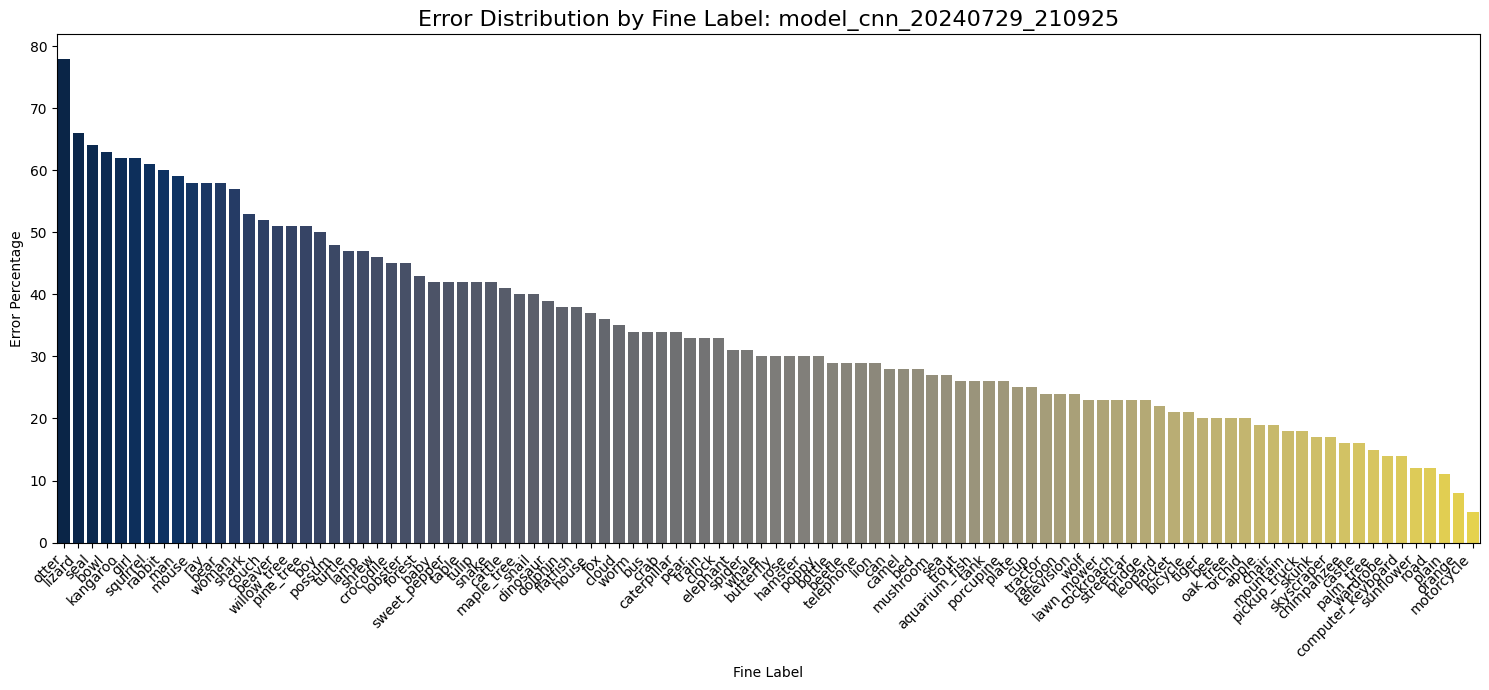

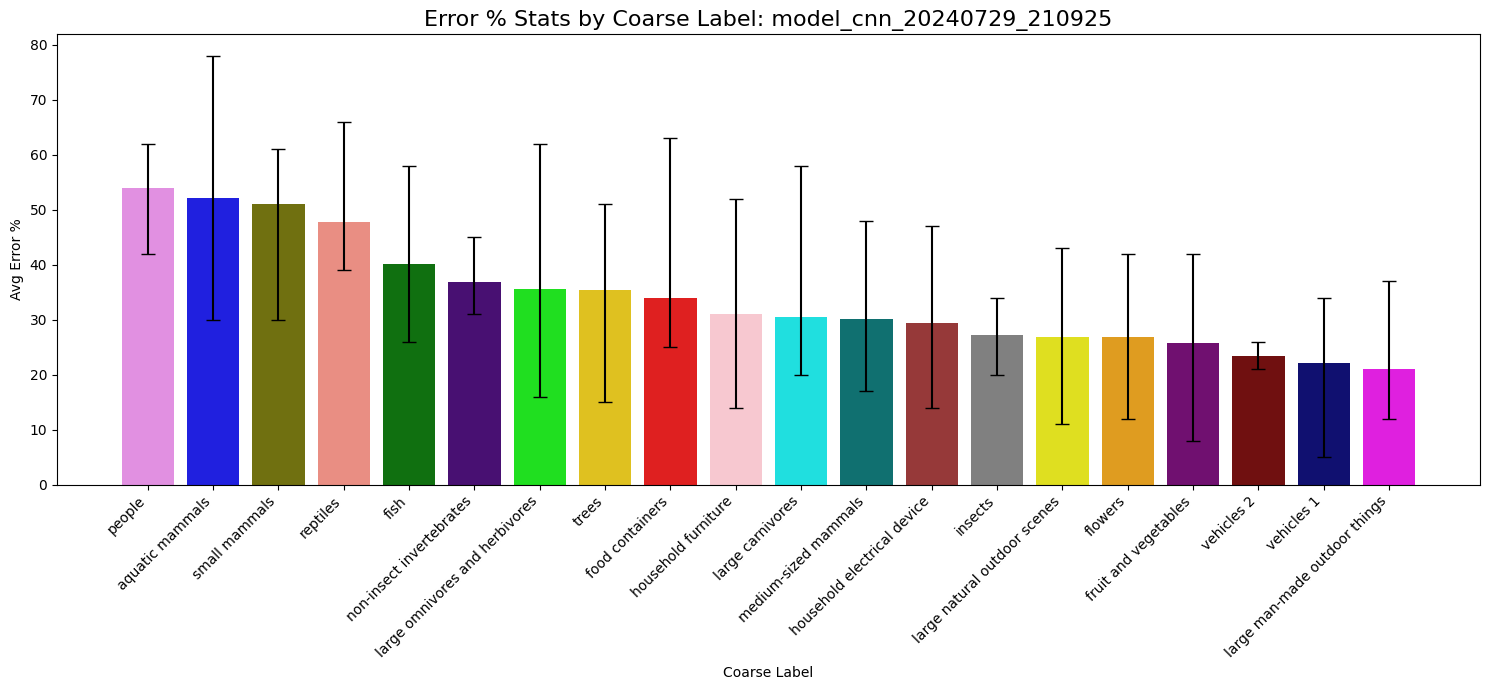

In [17]:
coarse_label_colors = {
    'aquatic mammals': 'blue',
    'fish': 'green',
    'flowers': 'orange',
    'food containers': 'red',
    'fruit and vegetables': 'purple',
    'household electrical device': 'brown',
    'household furniture': 'pink',
    'insects': 'gray',
    'large carnivores': 'cyan',
    'large man-made outdoor things': 'magenta',
    'large natural outdoor scenes': 'yellow',
    'large omnivores and herbivores': 'lime',
    'medium-sized mammals': 'teal',
    'non-insect invertebrates': 'indigo',
    'people': 'violet',
    'reptiles': 'salmon',
    'small mammals': 'olive',
    'trees': 'gold',
    'vehicles 1': 'navy',
    'vehicles 2': 'maroon',
}

# Error Distribution by Fine Label
plt.figure(figsize=(15, 7))
sns.barplot(x='Fine Label', y='Error', data=class_performance.sort_values(by='Error', ascending=False), palette='cividis')
plt.title(f'Error Distribution by Fine Label: {model_name}', fontsize=16)
plt.xlabel('Fine Label')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Error Percentage')
plt.tight_layout()
plt.show()


# Calculate min, mean, max error for each coarse label
error_stats = class_performance.groupby('Coarse Label')['Error'].agg(['mean', 'min', 'max']).reset_index().sort_values(by='mean', ascending=False)
error_stats['color'] = error_stats['Coarse Label'].map(coarse_label_colors)

# Convert 'Coarse Label' series to list for ordering
order = error_stats['Coarse Label'].tolist()

# Error % Stats by Coarse Label
plt.figure(figsize=(15, 7))

sns.barplot(x='Coarse Label', y='mean', data=error_stats, order=order, palette=error_stats['color'].tolist())
plt.errorbar(x=range(len(order)), y=error_stats['mean'],
             yerr=[error_stats['mean'] - error_stats['min'], error_stats['max'] - error_stats['mean']],
             fmt='none', color='black', capsize=5, zorder=5)  # zorder to bring error bars to the front

plt.title(f'Error % Stats by Coarse Label: {model_name}', fontsize=16)
plt.xlabel('Coarse Label')
plt.xticks(range(len(order)), order, rotation=45, ha='right')
plt.ylabel('Avg Error %')
plt.tight_layout()
plt.show()

